## Title Page:

**College of Professional Studies, Northeastern University**  
**ALY6020**  
**Professor Ajit Appari**  
**October 17th, 2024**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
df = pd.read_csv('/Users/sahildeshmukh/Downloads/week 4 - Nashville_housing_data.csv')

### PART 1: EDA

In [5]:

df.head()


,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [7]:
# Rename the columns for better readability if necessary
df.rename(columns={
    'Unnamed: 0': 'Index',
    'Parcel ID': 'Parcel ID',
    'Land Use': 'Land Use',
    'Property Address': 'Property Address',
    'Suite/ Condo #': 'Suite/Condo',
    'Property City': 'Property City',
    'Sale Date': 'Sale Date',
    'Legal Reference': 'Legal Reference',
    'Sold As Vacant': 'Sold As Vacant',
    'Multiple Parcels Involved in Sale': 'Multiple Parcels',
    'Building Value': 'Building Value',
    'Finished Area': 'Finished Area',
    'Foundation Type': 'Foundation Type',
    'Year Built': 'Year Built',
    'Exterior Wall': 'Exterior Wall',
    'Grade': 'Grade',
    'Bedrooms': 'Bedrooms',
    'Full Bath': 'Full Bath',
    'Half Bath': 'Half Bath',
    'Sale Price Compared To Value': 'Sale Price Compared to Value'
}, inplace=True)

df.head()

,Index,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared to Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [9]:
# Display the summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
              Index  Suite/ Condo   #       Acreage  Neighborhood  \
count  22651.000000               0.0  22651.000000  22651.000000   
mean   27889.491192               NaN      0.454705   4432.715024   
std    16598.865706               NaN      0.611818   2142.803595   
min        1.000000               NaN      0.040000    107.000000   
25%    13324.500000               NaN      0.200000   3130.000000   
50%    27712.000000               NaN      0.280000   4026.000000   
75%    42330.500000               NaN      0.460000   6229.000000   
max    56615.000000               NaN     17.500000   9530.000000   

         Land Value  Building Value  Finished Area    Year Built  \
count  2.265100e+04    2.265100e+04   22650.000000  22651.000000   
mean   7.013797e+04    1.722402e+05    1915.377151   1961.947684   
std    1.029035e+05    1.896424e+05    1079.094521     25.843908   
min    9.000000e+02    1.400000e+03     450.000000   1832.000000   
25%    2.200000e+

In [11]:
# List of categorical columns
categorical_columns = ['Land Use', 'Property City', 'Sold As Vacant', 'Multiple Parcels', 
                       'Foundation Type', 'Exterior Wall', 'Grade', 'Sale Price Compared to Value']
value_counts_tables = {}
for col in categorical_columns:
    value_counts = df[col].value_counts()
    value_counts_table = pd.DataFrame(value_counts).reset_index()
    value_counts_table.columns = [col, 'Count']  
    value_counts_tables[col] = value_counts_table

for col, table in value_counts_tables.items():
    print(f"\nUnique value counts for {col}:")
    print(table.to_markdown(index=False))  




Unique value counts for Land Use:
| Land Use               |   Count |
|:-----------------------|--------:|
| SINGLE FAMILY          |   21390 |
| DUPLEX                 |    1190 |
| RESIDENTIAL COMBO/MISC |      37 |
| QUADPLEX               |      34 |

Unique value counts for Property City:
| Property City   |   Count |
|:----------------|--------:|
| NASHVILLE       |   18010 |
| MADISON         |    1146 |
| ANTIOCH         |    1133 |
| HERMITAGE       |     913 |
| OLD HICKORY     |     824 |
| GOODLETTSVILLE  |     435 |
| BRENTWOOD       |     158 |
| WHITES CREEK    |      13 |
| JOELTON         |      11 |
| MOUNT JULIET    |       6 |

Unique value counts for Sold As Vacant:
| Sold As Vacant   |   Count |
|:-----------------|--------:|
| No               |   22517 |
| Yes              |     134 |

Unique value counts for Multiple Parcels:
| Multiple Parcels   |   Count |
|:-------------------|--------:|
| No                 |   22183 |
| Yes                |     468 |

Un

In [13]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Index                               0
Parcel ID                           0
Land Use                            0
Property Address                    2
Suite/ Condo   #                22651
Property City                       2
Sale Date                           0
Legal Reference                     0
Sold As Vacant                      0
Multiple Parcels                    0
City                                0
State                               0
Acreage                             0
Tax District                        0
Neighborhood                        0
Land Value                          0
Building Value                      0
Finished Area                       1
Foundation Type                     1
Year Built                          0
Exterior Wall                       0
Grade                               0
Bedrooms                            3
Full Bath                           1
Half Bath                         108
Sale Price Compared to

In [15]:
# Dropping unwanted columns
print("Column names in the DataFrame:")
print(df.columns)
df.columns = df.columns.str.strip()
if 'Suite/ Condo #' in df.columns:
    df.drop(columns=['Suite/ Condo #'], inplace=True)
else:
    print("Column 'Suite/ Condo #' not found in the DataFrame.")


Column names in the DataFrame:
Index(['Index', 'Parcel ID', 'Land Use', 'Property Address',
       'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference',
       'Sold As Vacant', 'Multiple Parcels', 'City', 'State', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared to Value'],
      dtype='object')
Column 'Suite/ Condo #' not found in the DataFrame.


In [17]:
# Handling missing values
df['Property Address'] = df['Property Address'].fillna('Unknown')  
df['Property City'] = df['Property City'].fillna('Unknown')       


In [19]:
# Filling numerical columns with median
df['Finished Area'] = df['Finished Area'].fillna(df['Finished Area'].median())
df['Foundation Type'] = df['Foundation Type'].fillna(df['Foundation Type'].mode()[0])
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())
df['Full Bath'] = df['Full Bath'].fillna(df['Full Bath'].median())
df['Half Bath'] = df['Half Bath'].fillna(df['Half Bath'].median())


In [21]:
# Step 2: Handling Outliers
# Removing rows where "Acreage" is abnormally high (e.g., above 5 acres for residential)
df = df[df['Acreage'] <= 5]



In [23]:
# Step 4: Remove Duplicates
# Checking and removing duplicate rows
df.drop_duplicates(inplace=True)


In [25]:
# Step 5: Convert Data Types
# Converting 'Sale Date' to datetime format
df['Sale Date'] = pd.to_datetime(df['Sale Date'])


In [27]:
# Step 6: Creating New Features
# Creating "Property Age" based on "Year Built"
df['Property Age'] = 2024 - df['Year Built']


In [29]:
# Step 7: Standardize Numerical Features 
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['Land Value', 'Building Value', 'Finished Area', 'Acreage', 'Bedrooms', 'Full Bath', 'Half Bath', 'Property Age']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Final step to Ensure no remaining missing values
print("Remaining missing values in each column:\n", df.isnull().sum())

Remaining missing values in each column:
 Index                               0
Parcel ID                           0
Land Use                            0
Property Address                    0
Suite/ Condo   #                22582
Property City                       0
Sale Date                           0
Legal Reference                     0
Sold As Vacant                      0
Multiple Parcels                    0
City                                0
State                               0
Acreage                             0
Tax District                        0
Neighborhood                        0
Land Value                          0
Building Value                      0
Finished Area                       0
Foundation Type                     0
Year Built                          0
Exterior Wall                       0
Grade                               0
Bedrooms                            0
Full Bath                           0
Half Bath                           0
Sale Pri

In [31]:
# View the cleansed dataset
df.head()

,Index,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels,...,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared to Value,Property Age
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,20130118-0006337,No,No,...,-0.711699,PT BSMT,1941,BRICK,C,-1.334877,-0.934021,-0.561240,Over,0.810072
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,20130124-0008033,No,No,...,0.169879,SLAB,2000,BRICK/FRAME,C,-0.124024,0.123862,1.528787,Over,-1.473516
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,20130128-0008863,No,No,...,0.221151,FULL BSMT,1948,BRICK/FRAME,B,1.086829,0.123862,-0.561240,Under,0.539138
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,20130131-0009929,No,No,...,0.055847,CRAWL,1910,FRAME,C,-1.334877,-0.934021,-0.561240,Under,2.009924
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,2013-01-04,20130118-0006110,No,No,...,-0.816534,CRAWL,1945,FRAME,C,-1.334877,-0.934021,-0.561240,Under,0.655253


### PART 2: Decision Tree Classifier

In [33]:
# Correct column reference for target variable
df['Sale Price Compared to Value'] = df['Sale Price Compared to Value'].map({'Over': 1, 'Under': 0})

# Check if the column has been successfully encoded
print(df['Sale Price Compared to Value'].head())


0    1
1    1
2    0
3    0
4    0
Name: Sale Price Compared to Value, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

columns_to_drop = ['Index', 'Suite/ Condo   #', 'Sale Date'] 
df_cleaned = df.drop(columns=columns_to_drop)

# Identify categorical columns for encoding
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Exclude the target column 'Sale Price Compared to Value'
if 'Sale Price Compared to Value' in categorical_cols:
    categorical_cols.remove('Sale Price Compared to Value')

# Use OneHotEncoder to encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Define X (features) and y (target)
X = df_encoded.drop(columns=['Sale Price Compared to Value'])  
y = df_encoded['Sale Price Compared to Value']  

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Build the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report for model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.22      0.27      1135
           1       0.77      0.86      0.81      3382

    accuracy                           0.70      4517
   macro avg       0.56      0.54      0.54      4517
weighted avg       0.66      0.70      0.67      4517



In [39]:
# Feature Importance
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importance Table:\n", feature_importances)


Feature Importance Table:
                                         Importance
Building Value                            0.080035
Finished Area                             0.059427
Acreage                                   0.049879
Property Age                              0.039343
Land Value                                0.034950
...                                            ...
Property Address_112  BART DR             0.000000
Property Address_112  BEECH BEND CT       0.000000
Property Address_112  BELLE MEADE BLVD    0.000000
Property Address_112  BELLEVUE DR S       0.000000
Grade_X                                   0.000000

[62485 rows x 1 columns]


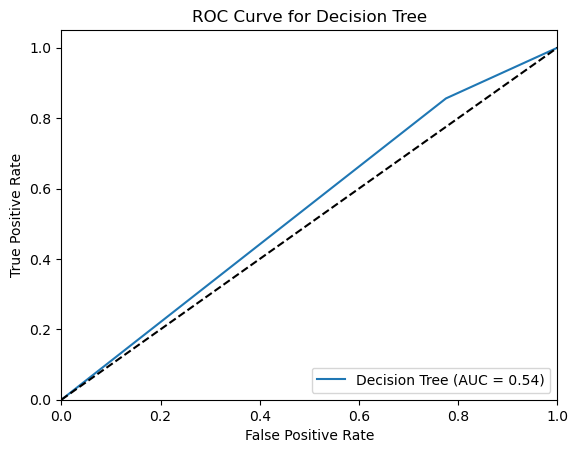

In [41]:
# ROC Curve and AUC Score
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line represents a random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

### PART 3:

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Reduce dataset size for quicker testing (10% of the training data)
X_train_small = X_train.sample(frac=0.1, random_state=42)
y_train_small = y_train[X_train_small.index]

# Build the Random Forest Classifier with fewer trees and limited depth
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5)  # Optimized for speed
print("Starting Random Forest training on a smaller sample...")
rf_clf.fit(X_train_small, y_train_small)
print("Training complete!")

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Print classification report for model evaluation
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Starting Random Forest training on a smaller sample...
Training complete!
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1135
           1       0.75      1.00      0.86      3382

    accuracy                           0.75      4517
   macro avg       0.37      0.50      0.43      4517
weighted avg       0.56      0.75      0.64      4517



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# Feature Importance
feature_importances_rf = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importance Table for Random Forest:\n", feature_importances_rf)


Feature Importance Table for Random Forest:
                                     Importance
Parcel ID_081 07 0 172.00             0.044988
Parcel ID_083 06 0 331.00             0.044469
Legal Reference_20160610-0058836      0.044420
Sold As Vacant_Yes                    0.041848
Neighborhood                          0.035285
...                                        ...
Property Address_1105  LISCHEY AVE    0.000000
Property Address_1105  N 14TH ST      0.000000
Property Address_1105  N 6TH ST       0.000000
Property Address_1105  PENNOCK AVE    0.000000
Grade_X                               0.000000

[62485 rows x 1 columns]


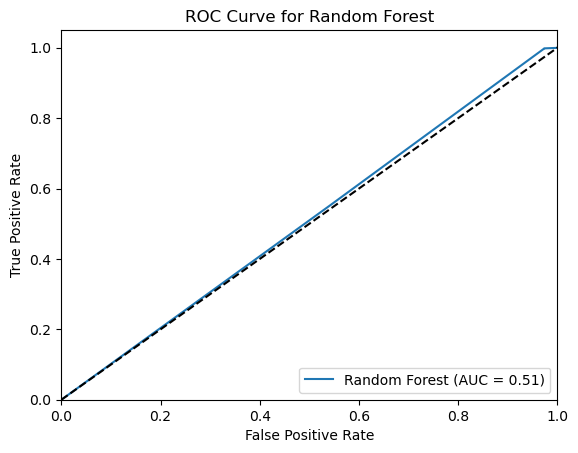

In [47]:
# ROC Curve and AUC Score for Random Forest
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line represents a random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

### PART 4:

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Reduce dataset size further for very quick testing (1% of the training data)
X_train_small = X_train.sample(frac=0.01, random_state=42)
y_train_small = y_train[X_train_small.index]

# Build the Gradient Boosting Classifier with very few trees
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=5, max_depth=3)
print("Starting Gradient Boosting training on a very small sample...")
gb_clf.fit(X_train_small, y_train_small)
print("Training complete!")

# Test on a small subset of the test set for quicker evaluation
X_test_small = X_test.sample(frac=0.1, random_state=42)
y_test_small = y_test[X_test_small.index]

# Make predictions on the small test set
y_pred_gb = gb_clf.predict(X_test_small)
print("Predictions complete!")

# Print classification report for model evaluation
print("Classification Report for Gradient Boosting Classifier (small test set):\n", classification_report(y_test_small, y_pred_gb))


Starting Gradient Boosting training on a very small sample...
Training complete!
Predictions complete!
Classification Report for Gradient Boosting Classifier (small test set):
               precision    recall  f1-score   support

           0       0.33      0.01      0.02       108
           1       0.76      0.99      0.86       344

    accuracy                           0.76       452
   macro avg       0.55      0.50      0.44       452
weighted avg       0.66      0.76      0.66       452



In [51]:
# Feature Importance
feature_importances_gb = pd.DataFrame(gb_clf.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importance Table for Gradient Boosting Classifier:\n", feature_importances_gb)


Feature Importance Table for Gradient Boosting Classifier:
                                      Importance
Finished Area                          0.415696
Neighborhood                           0.169410
Building Value                         0.148691
Acreage                                0.076567
Parcel ID_105 09 0 136.00              0.042052
...                                         ...
Property Address_1105  JENNINGS ST     0.000000
Property Address_1105  JONES ST        0.000000
Property Address_1105  JOSEPH AVE      0.000000
Property Address_1105  KIRKLAND AVE    0.000000
Grade_X                                0.000000

[62485 rows x 1 columns]


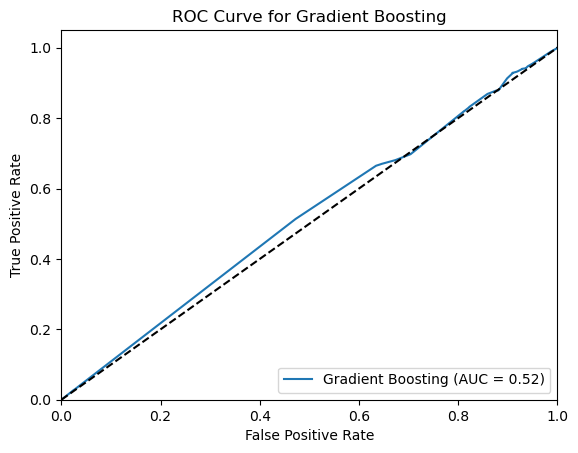

In [53]:
# ROC Curve and AUC Score for Gradient Boosting
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]  
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

### PART 5:

In [54]:
from sklearn.metrics import accuracy_score

# Decision Tree Performance
y_pred_dt = clf.predict(X_test)  
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Random Forest Performance
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Gradient Boosting Performance
y_pred_gb = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)


In [57]:
# Consolidate into a DataFrame
performance_metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [dt_accuracy, rf_accuracy, gb_accuracy],
    'Precision (Class 1)': [classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'], 
                            classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'], 
                            classification_report(y_test, y_pred_gb, output_dict=True)['1']['precision']],
    'Recall (Class 1)': [classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'], 
                         classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'], 
                         classification_report(y_test, y_pred_gb, output_dict=True)['1']['recall']],
    'F1-Score (Class 1)': [classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'], 
                           classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'], 
                           classification_report(y_test, y_pred_gb, output_dict=True)['1']['f1-score']]
})

# Display performance metrics table
print("Model Performance Metrics:")
print(performance_metrics)

Model Performance Metrics:
               Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0      Decision Tree  0.697366             0.766887          0.856002   
1      Random Forest  0.748727             0.748727          1.000000   
2  Gradient Boosting  0.744078             0.749105          0.989651   

   F1-Score (Class 1)  
0            0.808998  
1            0.856311  
2            0.852739  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [63]:
# Combine feature importances from the three models
dt_feature_importance = pd.Series(clf.feature_importances_, index=X_train.columns, name='Decision Tree')
rf_feature_importance = pd.Series(rf_clf.feature_importances_, index=X_train.columns, name='Random Forest')
gb_feature_importance = pd.Series(gb_clf.feature_importances_, index=X_train.columns, name='Gradient Boosting')

# Consolidate the feature importance scores into a DataFrame
feature_importance_df = pd.concat([dt_feature_importance, rf_feature_importance, gb_feature_importance], axis=1)

# Display consolidated feature importance table
print("Consolidated Feature Importance Table:")
print(feature_importance_df)




Consolidated Feature Importance Table:
                Decision Tree  Random Forest  Gradient Boosting
Acreage              0.049879       0.000000           0.076567
Neighborhood         0.022035       0.035285           0.169410
Land Value           0.034950       0.000000           0.020324
Building Value       0.080035       0.000000           0.148691
Finished Area        0.059427       0.000000           0.415696
...                       ...            ...                ...
Grade_E              0.000000       0.000000           0.000000
Grade_OFB            0.000000       0.000000           0.000000
Grade_OFC            0.000000       0.000000           0.000000
Grade_SSC            0.000000       0.000000           0.000000
Grade_X              0.000000       0.000000           0.000000

[62485 rows x 3 columns]


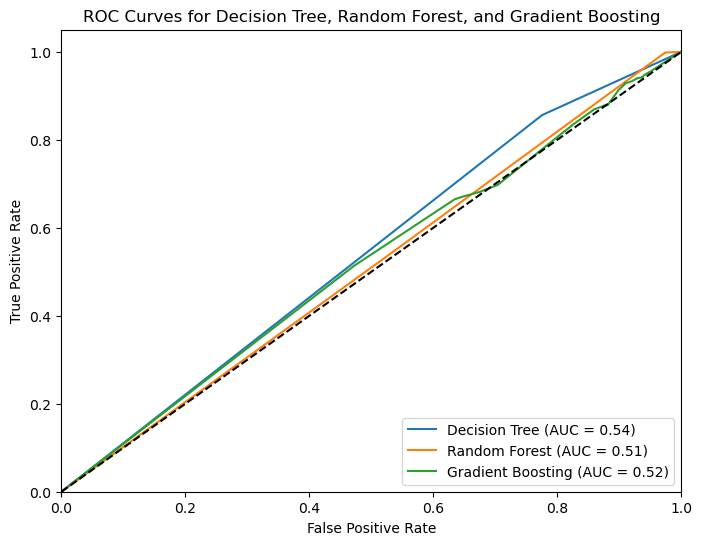

In [60]:
# ROC Curves for Decision Tree
y_prob_dt = clf.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# ROC Curves for Random Forest
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# ROC Curves for Gradient Boosting
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

# Plot the ROC curves for all three models
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree, Random Forest, and Gradient Boosting')
plt.legend(loc="lower right")
plt.show()
